In [88]:
import numpy as np
import matplotlib.pyplot as plt
from d6py import D6Solver
import copy
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib as mpl

In [89]:
initial_energy = 1e3  # GeV
final_energy = 1e9    # GeV

In [90]:
running_variable_names = [
    'g',
    'gp',
    'gs',
    'Lambda',
    'm2',
    'Theta',
    'Theta_p',
    'Theta_s',
    'Gu',
    'Gd',
    'Ge',
    'Cduql[0, 0, 0, 0]',
    'Cduql[0, 2, 2, 0]',
    'Cqu1[0, 2, 0, 2]',
    'Cqu1[2, 0, 2, 0]',
    'Cqu8[0, 2, 0, 2]',
    'Cqu8[2, 0, 2, 0]',
    'Cduue[0, 0, 0, 0]',
    'Cduue[0, 2, 2, 0]',
    'Cuu[0, 2, 0, 2]',
    'Cuu[2, 0, 2, 0]',
    'Cqqql[0, 0, 0, 0]',
    'Cqqql[0, 2, 2, 0]',
    'Cqq1[0, 2, 0, 2]',
    'Cqq1[2, 0, 2, 0]',
    'Cqq3[0, 2, 0, 2]',
    'Cqq3[2, 0, 2, 0]',
    'Cqque[0, 0, 0, 0]',
    'Cqque[0, 2, 2, 0]',
]

In [91]:
# SM interactions at 1 TeV
SM_initial_values = {
    'g': 0.61812326,
    'gp': 0.34971682,
    'gs': 1.06231166,
    'Lambda': 0.14970634,
    'm2': 8374.09249516,
    'Theta': 0.0,
    'Theta_p': 0.0,
    'Theta_s': 0.0,

    'Gu': np.array([
        [1.07975495e-05, -0.00143886, 0.00528027],
        [2.49303694e-06, 0.0062274, -0.03741809],
        [4.07803368e-08, 0.00027053, 0.88939254]
    ]),

    'Gd': np.array([
        [2.37179788e-05, 2.51667205e-09, -2.48813715e-06],
        [1.23211993e-10, 0.00048444, 1.76324968e-05],
        [-2.79766464e-09, 4.04956892e-07, 0.02067499]
    ]),

    'Ge': np.array([
        [2.99726848e-06, 0.0, 0.0],
        [0.0, 0.00061975, 0.0],
        [0.0, 0.0, 0.01042301]
    ]),

    'Cduql[0, 0, 0, 0]': 6.57462e-32,
    'Cqque[0, 0, 0, 0]': 3.30579e-32,
    'Cqqql[0, 0, 0, 0]':6.57462e-32,
    'Cduue[0, 0, 0, 0]': 6.57462e-32,

    'Cqu1[0, 2, 0, 2]': 1e-18,
    'Cqu8[0, 2, 0, 2]': 1e-18,
    'Cqq1[0, 2, 0, 2]': 1e-18,
    'Cqq3[0, 2, 0, 2]': 1e-18,
    'Cuu[0, 2, 0, 2]': 1e-18,
}

In [92]:
d6 = D6Solver()
d6.INITIAL_ENERGY_SCALE = initial_energy
d6.FINAL_ENERGY_SCALE = final_energy

for key, value in SM_initial_values.items():
    d6.Set_value(key, value)

ic1331 = 4e-20

""" d6.Set_value('Cduue[0,2,2,0]', ic1331)
d6.Set_value('Cduql[0,2,2,0]', ic1331)
d6.Set_value('Cqque[0,2,2,0]', ic1331)
d6.Set_value('Cqqql[0,2,2,0]', ic1331) """

d6.Initialize_running_variables(running_variable_names)

d6.load_beta_functions()

d6.Run()

In [93]:
print('Cduql[0,0,0,0]:', d6.Get_values(initial_energy, 'Cduql[0,0,0,0]'), '->', d6.Get_values(final_energy, 'Cduql[0,0,0,0]'))
print('Cqque[0,0,0,0]:', d6.Get_values(initial_energy, 'Cqque[0,0,0,0]'), '->', d6.Get_values(final_energy, 'Cqque[0,0,0,0]'))
print('Cqqql[0,0,0,0]:', d6.Get_values(initial_energy, 'Cqqql[0,0,0,0]'), '->', d6.Get_values(final_energy, 'Cqqql[0,0,0,0]'))
print('Cduue[0,0,0,0]:', d6.Get_values(initial_energy, 'Cduue[0,0,0,0]'), '->', d6.Get_values(final_energy, 'Cduue[0,0,0,0]'))

print('Cqu1[0,2,0,2]:', d6.Get_values(initial_energy, 'Cqu1[0,2,0,2]'), '->', d6.Get_values(final_energy, 'Cqu1[0,2,0,2]'))
print('Cqu8[0,2,0,2]:', d6.Get_values(initial_energy, 'Cqu8[0,2,0,2]'), '->', d6.Get_values(final_energy, 'Cqu8[0,2,0,2]'))
print('Cqq1[0,2,0,2]:', d6.Get_values(initial_energy, 'Cqq1[0,2,0,2]'), '->', d6.Get_values(final_energy, 'Cqq1[0,2,0,2]'))
print('Cqq3[0,2,0,2]:', d6.Get_values(initial_energy, 'Cqq3[0,2,0,2]'), '->', d6.Get_values(final_energy, 'Cqq3[0,2,0,2]'))
print('Cuu[0,2,0,2]:', d6.Get_values(initial_energy, 'Cuu[0,2,0,2]'), '->', d6.Get_values(final_energy, 'Cuu[0,2,0,2]'))

Cduql[0,0,0,0]: [6.57462e-32] -> [4.38223474e-32]
Cqque[0,0,0,0]: [3.30579e-32] -> [2.15304344e-32]
Cqqql[0,0,0,0]: [6.57462e-32] -> [3.24316807e-32]
Cduue[0,0,0,0]: [6.57462e-32] -> [4.64109724e-32]
Cqu1[0,2,0,2]: [1.e-18] -> [1.00706168e-18]
Cqu8[0,2,0,2]: [1.e-18] -> [-1.73581356e-21]
Cqq1[0,2,0,2]: [1.e-18] -> [1.97053066e-18]
Cqq3[0,2,0,2]: [1.e-18] -> [9.81864011e-19]
Cuu[0,2,0,2]: [1.e-18] -> [1.49647358e-18]


In [94]:
d6_tilde = D6Solver(initial_energy=initial_energy, final_energy=final_energy)
print("Initial Energy Scale:", d6_tilde.INITIAL_ENERGY_SCALE)
print("Final Energy Scale:", d6_tilde.FINAL_ENERGY_SCALE)

for key, value in SM_initial_values.items():
    d6_tilde.Set_value(key, value)

ic1331 = 4e-20

d6_tilde.Set_value('Cduue[0,2,2,0]', ic1331)
d6_tilde.Set_value('Cduql[0,2,2,0]', ic1331)
d6_tilde.Set_value('Cqque[0,2,2,0]', ic1331)
d6_tilde.Set_value('Cqqql[0,2,2,0]', ic1331)

d6_tilde.Initialize_running_variables(running_variable_names)


Initial Energy Scale: 1000.0
Final Energy Scale: 1000000000.0


In [95]:
d6_tilde.ADDITIONAL_CONSTANTS["mt"] = 177.76
d6_tilde.ADDITIONAL_CONSTANTS["mb"] = 4.18

d6_tilde.load_beta_functions(Beta_fns_file="beta_functions/BetaSMEFT_tilde.txt")

In [96]:
d6_tilde.Run()

In [97]:
print('Cduql[0,0,0,0]:', d6_tilde.Get_values(1e3, 'Cduql[0,0,0,0]'), '->', d6_tilde.Get_values(1e4, 'Cduql[0,0,0,0]'))
print('Cqque[0,0,0,0]:', d6_tilde.Get_values(1e3, 'Cqque[0,0,0,0]'), '->', d6_tilde.Get_values(1e4, 'Cqque[0,0,0,0]'))
print('Cqqql[0,0,0,0]:', d6_tilde.Get_values(1e3, 'Cqqql[0,0,0,0]'), '->', d6_tilde.Get_values(1e4, 'Cqqql[0,0,0,0]'))
print('Cduue[0,0,0,0]:', d6_tilde.Get_values(1e3, 'Cduue[0,0,0,0]'), '->', d6_tilde.Get_values(1e4, 'Cduue[0,0,0,0]'))

print()

print('Cqu1[0,2,0,2]:', d6_tilde.Get_values(1e3, 'Cqu1[0,2,0,2]'), '->', d6_tilde.Get_values(1e4, 'Cqu1[0,2,0,2]'))
print('Cqu8[0,2,0,2]:', d6_tilde.Get_values(1e3, 'Cqu8[0,2,0,2]'), '->', d6_tilde.Get_values(1e4, 'Cqu8[0,2,0,2]'))
print('Cqq1[0,2,0,2]:', d6_tilde.Get_values(1e3, 'Cqq1[0,2,0,2]'), '->', d6_tilde.Get_values(1e4, 'Cqq1[0,2,0,2]'))
print('Cqq3[0,2,0,2]:', d6_tilde.Get_values(1e3, 'Cqq3[0,2,0,2]'), '->', d6_tilde.Get_values(1e4, 'Cqq3[0,2,0,2]'))
print('Cuu[0,2,0,2]:', d6_tilde.Get_values(1e3, 'Cuu[0,2,0,2]'), '->', d6_tilde.Get_values(1e4, 'Cuu[0,2,0,2]'))

print()

print('Cduue[0,2,2,0]:', d6_tilde.Get_values(1e3, 'Cduue[0,2,2,0]'), '->', d6_tilde.Get_values(1e4, 'Cduue[0,2,2,0]'))
print('Cduql[0,2,2,0]:', d6_tilde.Get_values(1e3, 'Cduql[0,2,2,0]'), '->', d6_tilde.Get_values(1e4, 'Cduql[0,2,2,0]'))
print('Cqque[0,2,2,0]:', d6_tilde.Get_values(1e3, 'Cqque[0,2,2,0]'), '->', d6_tilde.Get_values(1e4, 'Cqque[0,2,2,0]'))
print('Cqqql[0,2,2,0]:', d6_tilde.Get_values(1e3, 'Cqqql[0,2,2,0]'), '->', d6_tilde.Get_values(1e4, 'Cqqql[0,2,2,0]'))

Cduql[0,0,0,0]: [6.57462e-32] -> [-4.38013753e-32]
Cqque[0,0,0,0]: [3.30579e-32] -> [-1.77176844e-31]
Cqqql[0,0,0,0]: [6.57462e-32] -> [6.7995226e-32]
Cduue[0,0,0,0]: [6.57462e-32] -> [6.18725409e-32]

Cqu1[0,2,0,2]: [1.e-18] -> [9.87838775e-19]
Cqu8[0,2,0,2]: [1.e-18] -> [6.79852383e-19]
Cqq1[0,2,0,2]: [1.e-18] -> [1.20853875e-18]
Cqq3[0,2,0,2]: [1.e-18] -> [9.72897879e-19]
Cuu[0,2,0,2]: [1.e-18] -> [1.09421863e-18]

Cduue[0,2,2,0]: [4.e-20] -> [3.7908546e-20]
Cduql[0,2,2,0]: [4.e-20] -> [3.68555543e-20]
Cqque[0,2,2,0]: [4.e-20] -> [3.67226679e-20]
Cqqql[0,2,2,0]: [4.e-20] -> [3.58518425e-20]


In [98]:
d6_om = D6Solver(initial_energy=initial_energy, final_energy=final_energy)
print("Initial Energy Scale:", d6_om.INITIAL_ENERGY_SCALE)
print("Final Energy Scale:", d6_om.FINAL_ENERGY_SCALE)

for key, value in SM_initial_values.items():
    d6_om.Set_value(key, value)

ic1331 = 4e-20

d6_om.Set_value('Cduue[0,2,2,0]', ic1331)
d6_om.Set_value('Cduql[0,2,2,0]', ic1331)
d6_om.Set_value('Cqque[0,2,2,0]', ic1331)
d6_om.Set_value('Cqqql[0,2,2,0]', ic1331)

d6_om.Initialize_running_variables(running_variable_names)

d6_om.ADDITIONAL_CONSTANTS["mt"] = 177.76
d6_om.ADDITIONAL_CONSTANTS["mb"] = 4.18

d6_om.load_beta_functions(Beta_fns_file="beta_functions/BetaSMEFT_only_mixing.txt")


Initial Energy Scale: 1000.0
Final Energy Scale: 1000000000.0


In [99]:
d6_om.Run()

In [100]:
print('Cduql[0,0,0,0]:', d6_om.Get_values(1e3, 'Cduql[0,0,0,0]'), '->', d6_om.Get_values(1e4, 'Cduql[0,0,0,0]'))
print('Cqque[0,0,0,0]:', d6_om.Get_values(1e3, 'Cqque[0,0,0,0]'), '->', d6_om.Get_values(1e4, 'Cqque[0,0,0,0]'))
print('Cqqql[0,0,0,0]:', d6_om.Get_values(1e3, 'Cqqql[0,0,0,0]'), '->', d6_om.Get_values(1e4, 'Cqqql[0,0,0,0]'))
print('Cduue[0,0,0,0]:', d6_om.Get_values(1e3, 'Cduue[0,0,0,0]'), '->', d6_om.Get_values(1e4, 'Cduue[0,0,0,0]'))

print()

print('Cqu1[0,2,0,2]:', d6_om.Get_values(1e3, 'Cqu1[0,2,0,2]'), '->', d6_om.Get_values(1e4, 'Cqu1[0,2,0,2]'))
print('Cqu8[0,2,0,2]:', d6_om.Get_values(1e3, 'Cqu8[0,2,0,2]'), '->', d6_om.Get_values(1e4, 'Cqu8[0,2,0,2]'))
print('Cqq1[0,2,0,2]:', d6_om.Get_values(1e3, 'Cqq1[0,2,0,2]'), '->', d6_om.Get_values(1e4, 'Cqq1[0,2,0,2]'))
print('Cqq3[0,2,0,2]:', d6_om.Get_values(1e3, 'Cqq3[0,2,0,2]'), '->', d6_om.Get_values(1e4, 'Cqq3[0,2,0,2]'))
print('Cuu[0,2,0,2]:', d6_om.Get_values(1e3, 'Cuu[0,2,0,2]'), '->', d6_om.Get_values(1e4, 'Cuu[0,2,0,2]'))

print()

print('Cduue[0,2,2,0]:', d6_om.Get_values(1e3, 'Cduue[0,2,2,0]'), '->', d6_om.Get_values(1e4, 'Cduue[0,2,2,0]'))
print('Cduql[0,2,2,0]:', d6_om.Get_values(1e3, 'Cduql[0,2,2,0]'), '->', d6_om.Get_values(1e4, 'Cduql[0,2,2,0]'))
print('Cqque[0,2,2,0]:', d6_om.Get_values(1e3, 'Cqque[0,2,2,0]'), '->', d6_om.Get_values(1e4, 'Cqque[0,2,2,0]'))
print('Cqqql[0,2,2,0]:', d6_om.Get_values(1e3, 'Cqqql[0,2,2,0]'), '->', d6_om.Get_values(1e4, 'Cqqql[0,2,2,0]'))

Cduql[0,0,0,0]: [6.57462e-32] -> [6.66620344e-32]
Cqque[0,0,0,0]: [3.30579e-32] -> [3.48864873e-32]
Cqqql[0,0,0,0]: [6.57462e-32] -> [7.74915511e-32]
Cduue[0,0,0,0]: [6.57462e-32] -> [6.66476622e-32]

Cqu1[0,2,0,2]: [1.e-18] -> [9.87838775e-19]
Cqu8[0,2,0,2]: [1.e-18] -> [6.79852383e-19]
Cqq1[0,2,0,2]: [1.e-18] -> [1.20853875e-18]
Cqq3[0,2,0,2]: [1.e-18] -> [9.72897879e-19]
Cuu[0,2,0,2]: [1.e-18] -> [1.09421863e-18]

Cduue[0,2,2,0]: [4.e-20] -> [3.7908546e-20]
Cduql[0,2,2,0]: [4.e-20] -> [3.68555543e-20]
Cqque[0,2,2,0]: [4.e-20] -> [3.67226679e-20]
Cqqql[0,2,2,0]: [4.e-20] -> [3.58518425e-20]


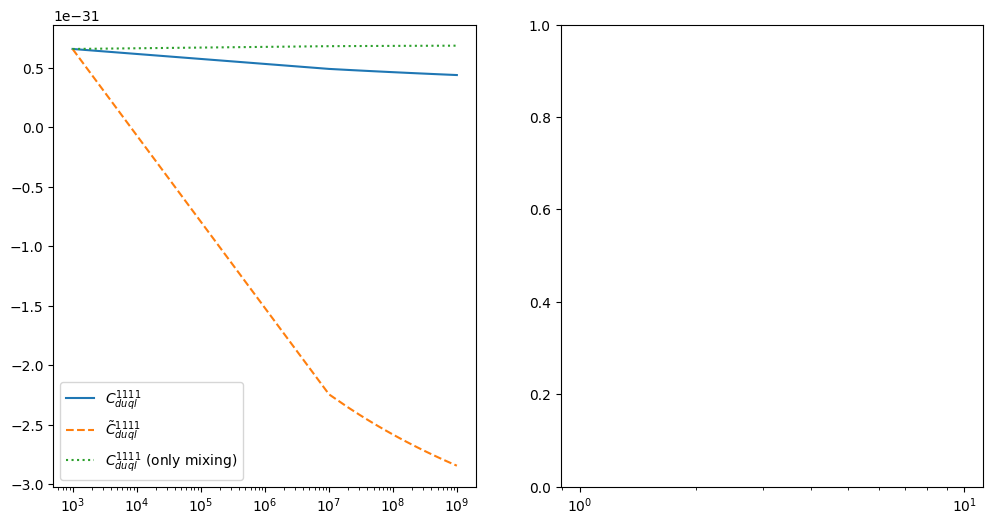

In [118]:
mu = np.linspace(initial_energy, final_energy, 100)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(mu, d6.Get_values(mu, 'Cduql[0,0,0,0]'), label=r'$C_{duql}^{1111}$')
axs[0].set_xscale('log')
axs[0].plot(mu, d6_tilde.Get_values(mu, 'Cduql[0,0,0,0]'), label=r'$\tilde{C}_{duql}^{1111}$', linestyle='dashed')
axs[0].plot(mu, d6_om.Get_values(mu, 'Cduql[0,0,0,0]'), label=r'$C_{duql}^{1111}$ (only mixing)', linestyle='dotted')
axs[0].legend()
axs[1].set_xscale('log')

In [112]:
d6_tilde.BETA_EXPRS['Beta_Cduql[0,0,0,0]']

-Cduql_0_0_0_0*Gd_0_0*conjugate(Gd_0_0) - Cduql_0_0_0_0*Gu_0_0*conjugate(Gu_0_0) - Cduql_0_0_0_0*(9*g**2/2 + 11*gp**2/6 + 4*gs**2) + Cduql_0_0_0_0*(Gd_0_0*conjugate(Gd_0_0) + Gd_0_1*conjugate(Gd_0_1) + Gd_0_2*conjugate(Gd_0_2))/2 + Cduql_0_0_0_0*(Gd_0_0*conjugate(Gd_0_0) + Gd_1_0*conjugate(Gd_1_0) + Gd_2_0*conjugate(Gd_2_0)) + Cduql_0_0_0_0*(Ge_0_0*conjugate(Ge_0_0) + Ge_0_1*conjugate(Ge_0_1) + Ge_0_2*conjugate(Ge_0_2))/2 + Cduql_0_0_0_0*(Gu_0_0*conjugate(Gu_0_0) + Gu_0_1*conjugate(Gu_0_1) + Gu_0_2*conjugate(Gu_0_2))/2 + Cduql_0_0_0_0*(Gu_0_0*conjugate(Gu_0_0) + Gu_1_0*conjugate(Gu_1_0) + Gu_2_0*conjugate(Gu_2_0)) + 379183.4112*Cduql_0_2_2_0*Cqu1_0_2_0_2 + 1516733.6448*Cduql_0_2_2_0*Cqu8_0_2_0_2 - Cduql_0_2_2_0*Gu_2_0*conjugate(Gu_0_2) + 3*Cduue_0_0_0_0*conjugate(Ge_0_0)*conjugate(Gu_0_0) + 6*Cqqql_0_0_0_0*Gd_0_0*Gu_0_0 + 8*Cqqql_0_2_2_0*Gd_2_0*Gu_2_0 + 2*Cqque_0_0_0_0*Gd_0_0*conjugate(Ge_0_0)

In [113]:
d6.BETA_EXPRS['Beta_Cduql[0,0,0,0]']

-Cduql_0_0_0_0*Gd_0_0*conjugate(Gd_0_0) - Cduql_0_0_0_0*Gu_0_0*conjugate(Gu_0_0) - Cduql_0_0_0_0*(9*g**2/2 + 11*gp**2/6 + 4*gs**2) + Cduql_0_0_0_0*(Gd_0_0*conjugate(Gd_0_0) + Gd_0_1*conjugate(Gd_0_1) + Gd_0_2*conjugate(Gd_0_2))/2 + Cduql_0_0_0_0*(Gd_0_0*conjugate(Gd_0_0) + Gd_1_0*conjugate(Gd_1_0) + Gd_2_0*conjugate(Gd_2_0)) + Cduql_0_0_0_0*(Ge_0_0*conjugate(Ge_0_0) + Ge_0_1*conjugate(Ge_0_1) + Ge_0_2*conjugate(Ge_0_2))/2 + Cduql_0_0_0_0*(Gu_0_0*conjugate(Gu_0_0) + Gu_0_1*conjugate(Gu_0_1) + Gu_0_2*conjugate(Gu_0_2))/2 + Cduql_0_0_0_0*(Gu_0_0*conjugate(Gu_0_0) + Gu_1_0*conjugate(Gu_1_0) + Gu_2_0*conjugate(Gu_2_0)) - Cduql_0_2_2_0*Gu_2_0*conjugate(Gu_0_2) + 3*Cduue_0_0_0_0*conjugate(Ge_0_0)*conjugate(Gu_0_0) + 6*Cqqql_0_0_0_0*Gd_0_0*Gu_0_0 + 8*Cqqql_0_2_2_0*Gd_2_0*Gu_2_0 + 2*Cqque_0_0_0_0*Gd_0_0*conjugate(Ge_0_0)

In [114]:
d6_om.BETA_EXPRS['Beta_Cduql[0,0,0,0]']

379183.4112*Cduql_0_2_2_0*Cqu1_0_2_0_2 + 1516733.6448*Cduql_0_2_2_0*Cqu8_0_2_0_2

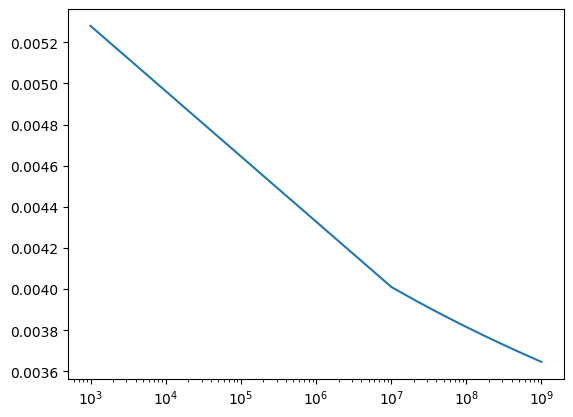

In [116]:
plt.plot(mu, d6_tilde.Get_values(mu, 'Gu[0,2]'))
plt.xscale('log')